# Lab 3: Exploratory Data Analysis for Classification using Pandas and Matplotlib

### Preliminary plotting stuff to get things going

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import brewer2mpl
from matplotlib import rcParams

#colorbrewer2 Dark2 qualitative color table
dark2_cmap = brewer2mpl.get_map('Dark2', 'Qualitative', 7)
dark2_colors = dark2_cmap.mpl_colors

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

D:\Users\ZB-TQ-G1010448\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()

In [4]:
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

## 1. The Olive Oils dataset
Some of the following text is taken from the rggobi book (http://www.ggobi.org/book/). It is an excellent book on visualization and EDA for classification, and is available freely as a pdf from Hollis for those with a Harvard Id. Even though the book uses ggobi, a lot of the same analysis can be done in Mondrian or directly in Matplotlib/Pandas (albeit not interactively).

<hr/>

"The Olive Oils data has eight explanatory variables (levels of fatty acids in the oils) and nine classes (areas of Italy). The goal of the analysis is to develop rules that reliably distinguish oils from the nine different areas. It is a problem of practical interest, because oil from some areas is more highly valued and unscrupulous suppliers sometimes make false claims about the origin of their oil. The content of the oils is a subject of study in its own right: Olive oil has high nutritional value, and some of its constituent fatty acids are considered to be more beneficial than others."

In addition, fatty acid contents vary with climate: this information is important in deciding which varieties to grow where.

"Source: Forina, M., Armanino, C., Lanteri, S. & Tiscornia, E. (1983), Classification of Olive Oils from their Fatty Acid Composition, in Martens, H. and
Russwurm Jr., H., eds, Food Research and Data Analysis, Applied Science
Publishers, London, pp. 189–214. It was brought to our attention by Glover
& Hopke (1992).

Number of rows: 572

Number of variables: 10

Description: This data consists of the percentage composition of fatty acids
found in the lipid fraction of Italian olive oils. The data arises from a study
to determine the authenticity of an olive oil."
<hr/>

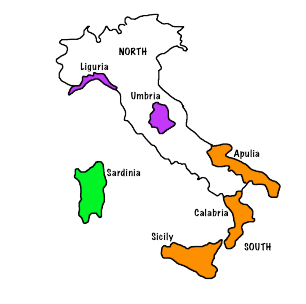

In [5]:
from IPython.display import Image
Image(filename='Italy.png')

In [6]:
df=pd.read_csv("data/olive.csv")
df.head(5)

,Unnamed: 0,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,5.North-Apulia,1,1,1051,67,259,7771,672,50,80,46


In [7]:
print(df.columns)
df.rename(columns={df.columns[0]:'areastring'}, inplace=True)
df.columns

Index(['Unnamed: 0', 'region', 'area', 'palmitic', 'palmitoleic', 'stearic', 'oleic', 'linoleic', 'linolenic', 'arachidic', 'eicosenoic'], dtype='object')


Index(['areastring', 'region', 'area', 'palmitic', 'palmitoleic', 'stearic', 'oleic', 'linoleic', 'linolenic', 'arachidic', 'eicosenoic'], dtype='object')

In [9]:
print('regions\t', df.region.unique())
print('areas\t', df.area.unique())

regions	 [1 2 3]
areas	 [1 2 3 4 5 6 9 7 8]


In [10]:
pd.crosstab(df.area, df.region)

region,1,2,3
area,,,
1,25,0,0
2,56,0,0
3,206,0,0
4,36,0,0
5,0,65,0
6,0,33,0
7,0,0,50
8,0,0,50
9,0,0,51


In [11]:
df.head()

,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,5.North-Apulia,1,1,1051,67,259,7771,672,50,80,46


In [12]:
df.areastring=df.areastring.map(lambda x: x.split('.')[-1])
df.head()

,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,North-Apulia,1,1,1051,67,259,7771,672,50,80,46


In [13]:
df[['palmitic','oleic']].head()

,palmitic,oleic
0,1075,7823
1,1088,7709
2,911,8113
3,966,7952
4,1051,7771


In [14]:
print("type of df[['palmitic']]:\t", type(df[['palmitic']])) 
print("type of df['palmitic']:\t\t", type(df['palmitic']))

type of df[['palmitic']]:	 <class 'pandas.core.frame.DataFrame'>
type of df['palmitic']:		 <class 'pandas.core.series.Series'>


In [15]:
df.areastring.unique()

array(['North-Apulia', 'Calabria', 'South-Apulia', 'Sicily',
       'Inland-Sardinia', 'Coast-Sardinia', 'Umbria', 'East-Liguria',
       'West-Liguria'], dtype=object)

In [16]:
acidlist=['palmitic', 'palmitoleic', 'stearic', 'oleic', 'linoleic', 'linolenic', 'arachidic', 'eicosenoic']

#your code here

dfsub=df[acidlist].apply(lambda x: x/100.0)
dfsub.head()

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46


In [17]:
df[acidlist]=dfsub
df.head()

,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,North-Apulia,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,North-Apulia,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,North-Apulia,1,1,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,North-Apulia,1,1,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46


## 2. Quick intro to Matplotlib
This is just a quick and dirty intro. Please read the excellent tutorial <a href="http://nbviewer.ipython.org/urls/raw.github.com/jrjohansson/scientific-python-lectures/master/Lecture-4-Matplotlib.ipynb">here</a>.

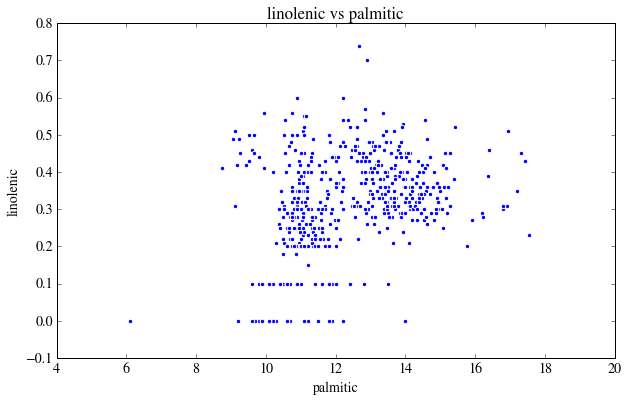

In [18]:
fig=plt.figure()
plt.scatter(df.palmitic, df.linolenic)
axis = fig.gca() #get current axis
axis.set_title('linolenic vs palmitic')
axis.set_xlabel('palmitic')
axis.set_ylabel('linolenic')
#fig can be got with fig.gcf()

(array([   1.,    0.,   11.,   71.,  188.,   79.,  131.,   73.,    9.,    9.]),
 array([  6.1  ,   7.243,   8.386,   9.529,  10.672,  11.815,  12.958,
         14.101,  15.244,  16.387,  17.53 ]),
 <a list of 10 Patch objects>)

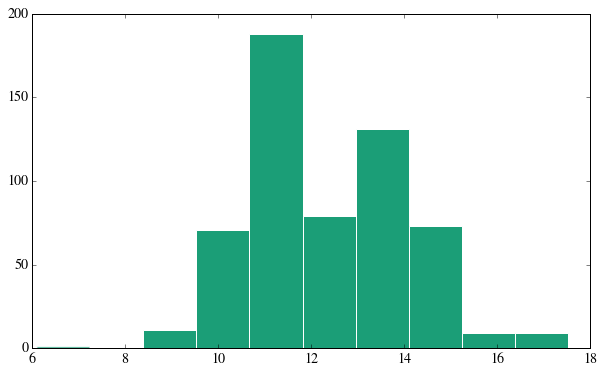

In [19]:
plt.hist(df.palmitic)

A more object oriented approach sees us using the `subplots` function to set both figure and axis.

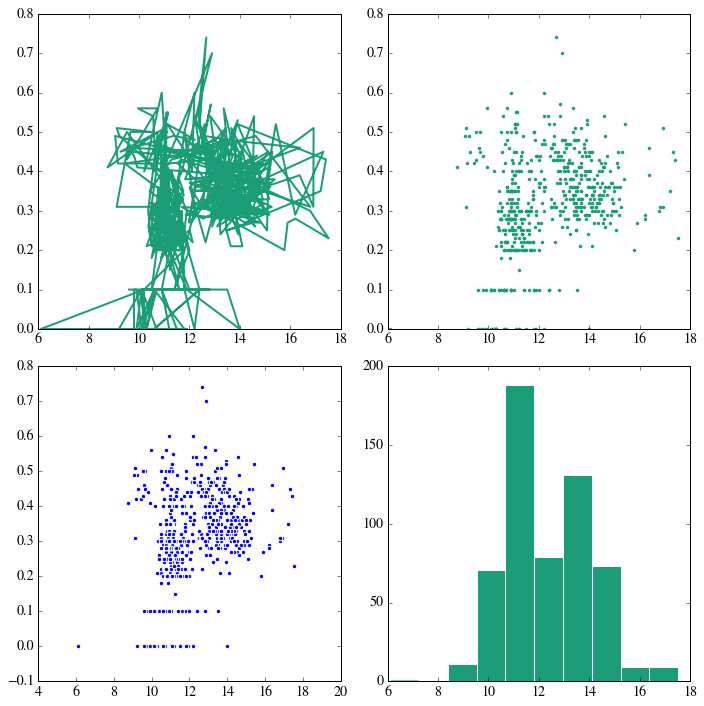

In [20]:
fig, axes = plt.subplots(figsize=(10,10), nrows=2, ncols=2)
axes[0][0].plot(df.palmitic, df.linolenic)
axes[0][1].plot(df.palmitic, df.linolenic, '.')
axes[1][0].scatter(df.palmitic, df.linolenic)
axes[1][1].hist(df.palmitic)
fig.tight_layout()

Make scatterplots of the acids in the list `yacids` against the acids in the list `xacids`. As the names suggest, plot the acids in `yacids` along the y axis and the acids in `xacids` along the x axis. Label the axes with the respective acid name. Set it up as a grid with 3 rows and 2 columns.

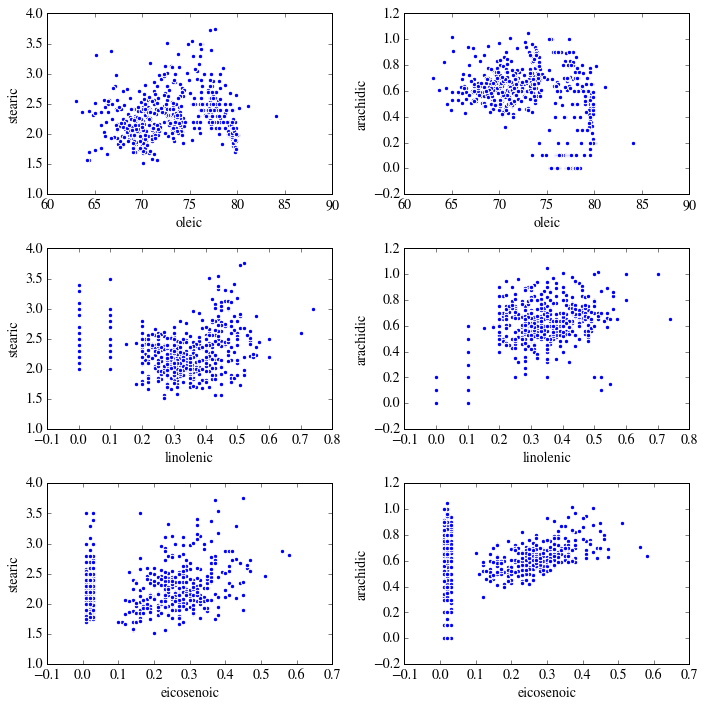

In [21]:
xacids=['oleic','linolenic','eicosenoic']
yacids=['stearic','arachidic']

#your code here
fig, axes=plt.subplots(figsize=(10,10), nrows=len(xacids), ncols=len(yacids))
for i, xacid in enumerate(xacids):
    for j, yacid in enumerate(yacids):
        axes[i][j].scatter(df[xacid],df[yacid])
        axes[i][j].set_xlabel(xacid)
        axes[i][j].set_ylabel(yacid)
fig.tight_layout()

## 3. Pandas Data Munging
The first concept we deal with here is pandas `groupby`. The idea is to group a dataframe by the values of a particular factor variable. The documentation can be found <a href="http://pandas.pydata.org/pandas-docs/dev/groupby.html">here</a>.

In [22]:
df.head()

,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,North-Apulia,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,North-Apulia,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,North-Apulia,1,1,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,North-Apulia,1,1,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46


In [23]:
region_groupby = df.groupby('region')
print(type(region_groupby))
region_groupby.head()

<class 'pandas.core.groupby.DataFrameGroupBy'>


,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,North-Apulia,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,North-Apulia,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,North-Apulia,1,1,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,North-Apulia,1,1,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46
323,Inland-Sardinia,2,5,11.29,1.20,2.22,72.72,11.12,0.43,0.98,0.02
324,Inland-Sardinia,2,5,10.42,1.35,2.10,73.76,11.16,0.35,0.90,0.03
325,Inland-Sardinia,2,5,11.03,0.96,2.10,73.80,10.85,0.32,0.94,0.03
326,Inland-Sardinia,2,5,11.18,0.97,2.21,72.79,11.54,0.35,0.94,0.02
327,Inland-Sardinia,2,5,10.52,0.95,2.15,73.88,11.26,0.31,0.92,0.01


The function `groupby` gives you a dictionary-like object, with the keys being the values of the factor, and the values being the corresponding subsets of the dataframe.

In [26]:
for key, value in region_groupby:
    print('(key, type(value)) = (', key, ',', type(value))
    v = value
    
v.head()

(key, type(value)) = ( 1 , <class 'pandas.core.frame.DataFrame'>
(key, type(value)) = ( 2 , <class 'pandas.core.frame.DataFrame'>
(key, type(value)) = ( 3 , <class 'pandas.core.frame.DataFrame'>


,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
421,Umbria,3,9,10.85,0.70,1.80,79.55,6.05,0.20,0.50,0.01
422,Umbria,3,9,10.85,0.70,1.85,79.55,6.00,0.25,0.55,0.01
423,Umbria,3,9,10.90,0.60,1.90,79.50,6.00,0.28,0.47,0.02
424,Umbria,3,9,10.80,0.65,1.89,79.60,6.02,0.35,0.20,0.01
425,Umbria,3,9,10.90,0.60,1.95,79.55,6.00,0.28,0.42,0.02


The `groupby` function also acts like an object that can be **mapped**. After the mapping is complete, the rows are put together (**reduced**) into a larger dataframe. For example, using the `describe` function. The documentation of the `describe` function can be found <a href="http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.describe.html">here</a>.

In [27]:
dfrd=region_groupby.describe()
print(type(dfrd))
dfrd.head(20)

<class 'pandas.core.frame.DataFrame'>


region        area    palmitic  palmitoleic     stearic       oleic    linoleic   linolenic   arachidic  eicosenoic
region                                                                                                                           
1      count   323.0  323.000000  323.000000   323.000000  323.000000  323.000000  323.000000  323.000000  323.000000  323.000000
       mean      1.0    2.783282   13.322879     1.548019    2.287740   71.000093   10.334985    0.380650    0.631176    0.273220
       std       0.0    0.741054    1.529349     0.507237    0.398709    3.451431    2.106730    0.079727    0.111644    0.083915
       min       1.0    1.000000    8.750000     0.350000    1.520000   63.000000    4.480000    0.200000    0.320000    0.100000
       25%       1.0    2.500000   12.680000     1.215000    2.015000   68.830000    8.555000    0.320000    0.560000    0.220000
       50%       1.0    3.000000   13.460000     1.630000    2.230000   70.300000   10.900000    0.370000    0.620000    0.270000
       75%       1.0    3.000000   14.190000     1.850000    2.495000   72.835000   12.025000    0.440000    0.690000    0.320000
       max       1.0    4.000000   17.530000     2.800000    3.750000   81.130000   14.620000    0.740000    1.020000    0.580000
2      count    98.0   98.000000   98.000000    98.000000   98.000000   98.000000   98.000000   98.000000   98.000000   98.000000
       mean      2.0    5.336735   11.113469     0.967449    2.261837   72.680204   11.965306    0.270918    0.731735    0.019388
       std       0.0    0.475023    0.404111     0.138514    0.176363    1.418783    1.072336    0.053844    0.118826    0.007436
       min       2.0    5.000000   10.300000     0.350000    1.990000   68.820000   10.570000    0.150000    0.450000    0.010000
       25%       2.0    5.000000   10.852500     0.882500    2.120000   71.372500   11.122500    0.230000    0.660000    0.010000
       50%       2.0    5.000000   11.075000     0.960000    2.220000   73.255000   11.465000    0.270000    0.720000    0.020000
       75%       2.0    6.000000   11.372500     1.040000    2.395000   73.810000   13.065000    0.300000    0.810000    0.020000
       max       2.0    6.000000   12.130000     1.350000    2.720000   74.390000   14.700000    0.430000    1.050000    0.030000
3      count   151.0  151.000000  151.000000   151.000000  151.000000  151.000000  151.000000  151.000000  151.000000  151.000000
       mean      3.0    8.006623   10.948013     0.837351    2.308013   77.930530    7.270331    0.217881    0.375762    0.019735
       std       0.0    0.820542    0.825635     0.264388    0.389560    1.648155    1.431226    0.168865    0.293586    0.007298
       min       3.0    7.000000    6.100000     0.150000    1.700000   73.400000    5.100000    0.000000    0.000000    0.010000

So, one may iterate through the groupby 'dictionary', get the pandas series from each sub-dataframe, and compute the standard deviation using the `std` function (find documentation of `std` <a href="http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.std.html">here</a>):

In [28]:
vecs=[]
keys=[]
for key, value in region_groupby:
    k=key
    v=value.std()
print(k, type(v), v)

3 <class 'pandas.core.series.Series'> region         0.000000
area           0.820542
palmitic       0.825635
palmitoleic    0.264388
stearic        0.389560
oleic          1.648155
linoleic       1.431226
linolenic      0.168865
arachidic      0.293586
eicosenoic     0.007298
dtype: float64


Or one might let pandas take care of concatenating the series obtained by running `std` on each dataframe back into a dataframe for us. Notice that the output dataframe is automatically indexed by region for us!

In [30]:
dfbystd=df.groupby('region').std()
dfbystd.head()

,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,
1,0.741054,1.529349,0.507237,0.398709,3.451431,2.106730,0.079727,0.111644,0.083915
2,0.475023,0.404111,0.138514,0.176363,1.418783,1.072336,0.053844,0.118826,0.007436
3,0.820542,0.825635,0.264388,0.389560,1.648155,1.431226,0.168865,0.293586,0.007298


Or one can use `aggregate` to pass an arbitrary function of to the sub-dataframe. The function is applied columnwise.

In [35]:
dfbymean=region_groupby.aggregate(np.mean)
dfbymean.head()

,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,
1,2.783282,13.322879,1.548019,2.287740,71.000093,10.334985,0.380650,0.631176,0.273220
2,5.336735,11.113469,0.967449,2.261837,72.680204,11.965306,0.270918,0.731735,0.019388
3,8.006623,10.948013,0.837351,2.308013,77.930530,7.270331,0.217881,0.375762,0.019735


In [32]:
region_groupby.aggregate(lambda x: x.palmitic.sum()) #probably not what u had in mind :-)

,areastring,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,,
1,4303.29,4303.29,4303.29,4303.29,4303.29,4303.29,4303.29,4303.29,4303.29,4303.29
2,1089.12,1089.12,1089.12,1089.12,1089.12,1089.12,1089.12,1089.12,1089.12,1089.12
3,1653.15,1653.15,1653.15,1653.15,1653.15,1653.15,1653.15,1653.15,1653.15,1653.15


Or one can use `apply` to pass an arbitrary function to the sub-dataframe. This one takes the dataframe as argument.

In [34]:
region_groupby.apply(lambda f: f.mean())

,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,,
1,1.0,2.783282,13.322879,1.548019,2.287740,71.000093,10.334985,0.380650,0.631176,0.273220
2,2.0,5.336735,11.113469,0.967449,2.261837,72.680204,11.965306,0.270918,0.731735,0.019388
3,3.0,8.006623,10.948013,0.837351,2.308013,77.930530,7.270331,0.217881,0.375762,0.019735


In [36]:
region_groupby.apply(lambda f: f.palmitic.mean())

region
1    13.322879
2    11.113469
3    10.948013
dtype: float64

In [37]:
renamedict_std={k:k+"_std" for k in acidlist}
renamedict_mean={k:k+"_mean" for k in acidlist}
dfbystd.rename(inplace=True, columns=renamedict_std)
dfbymean.rename(inplace=True, columns=renamedict_mean) 
dfbystd.head()

,area,palmitic_std,palmitoleic_std,stearic_std,oleic_std,linoleic_std,linolenic_std,arachidic_std,eicosenoic_std
region,,,,,,,,,
1,0.741054,1.529349,0.507237,0.398709,3.451431,2.106730,0.079727,0.111644,0.083915
2,0.475023,0.404111,0.138514,0.176363,1.418783,1.072336,0.053844,0.118826,0.007436
3,0.820542,0.825635,0.264388,0.389560,1.648155,1.431226,0.168865,0.293586,0.007298


Pandas can do general merges. When we do that along an index, it's called a `join` (<a href="http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.join.html">documentation</a>). Here we make two sub-dataframes and join them on the common region index.

In [38]:
dfpalmiticmean = dfbymean[['palmitic_mean']] 
dfpalmiticstd = dfbystd[['palmitic_std']] 

newdfbyregion=dfpalmiticmean.join(dfpalmiticstd)
newdfbyregion.head()

,palmitic_mean,palmitic_std
region,,
1,13.322879,1.529349
2,11.113469,0.404111
3,10.948013,0.825635


Let's weight the palmitic acids content by a random weight. We'll first extract a subset of columns from `df` and then you will write a function to weigh the palmitic content by this random weight, delivering a weighted palmitic mean in the final dataframe.

In [39]:
weights=np.random.uniform(size=df.shape[0])
smallerdf=df[['palmitic']]
otherdf=df[['region']]
otherdf['weight'] = weights
otherdf.head()

D:\Users\ZB-TQ-G1010448\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,region,weight
0,1,0.697101
1,1,0.365378
2,1,0.509712
3,1,0.239009
4,1,0.412654


In [40]:
smallerdf=smallerdf.join(otherdf)
smallerdf.head()

,palmitic,region,weight
0,10.75,1,0.697101
1,10.88,1,0.365378
2,9.11,1,0.509712
3,9.66,1,0.239009
4,10.51,1,0.412654


Now lets use these weights to compute a weighted average over the palmitic column.

In [41]:
def wfunc(f):
    return (f.palmitic*f.weight).sum()/f.weight.sum()
smallerdf.groupby('region').apply(wfunc)

region
1    13.265347
2    11.115508
3    10.915467
dtype: float64

Finally aggregate the column percentages by summing them up over the regions.

In [42]:
def myfunc(column):
    return np.sum(column)
    
region_groupby.aggregate(myfunc)

,areastring,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,,
1,North-ApuliaNorth-ApuliaNorth-ApuliaNorth-Apul...,899,4303.29,500.01,738.94,22933.03,3338.20,122.95,203.87,88.25
2,Inland-SardiniaInland-SardiniaInland-SardiniaI...,523,1089.12,94.81,221.66,7122.66,1172.60,26.55,71.71,1.90
3,UmbriaUmbriaUmbriaUmbriaUmbriaUmbriaUmbriaUmbr...,1209,1653.15,126.44,348.51,11767.51,1097.82,32.90,56.74,2.98


In [46]:
    
region_groupby.aggregate(np.sum)

,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,
1,899,4303.29,500.01,738.94,22933.03,3338.20,122.95,203.87,88.25
2,523,1089.12,94.81,221.66,7122.66,1172.60,26.55,71.71,1.90
3,1209,1653.15,126.44,348.51,11767.51,1097.82,32.90,56.74,2.98


## One Dimensional Exploratory Data Analysis (EDA) with Pandas

In [48]:
rkeys=[1,2,3]
rvals=['South','Sardinia','North']
rmap={e[0]:e[1] for e in zip(rkeys,rvals)}
rmap

{1: 'South', 2: 'Sardinia', 3: 'North'}

In [49]:
mdf2=df.groupby('region').aggregate(np.mean)
mdf2=mdf2[acidlist]
mdf2.head()

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,
1,13.322879,1.548019,2.287740,71.000093,10.334985,0.380650,0.631176,0.273220
2,11.113469,0.967449,2.261837,72.680204,11.965306,0.270918,0.731735,0.019388
3,10.948013,0.837351,2.308013,77.930530,7.270331,0.217881,0.375762,0.019735


Let's make a bar plot of the relative mean percentages of the acids. In pandas this is as simple as:

(0, 100)

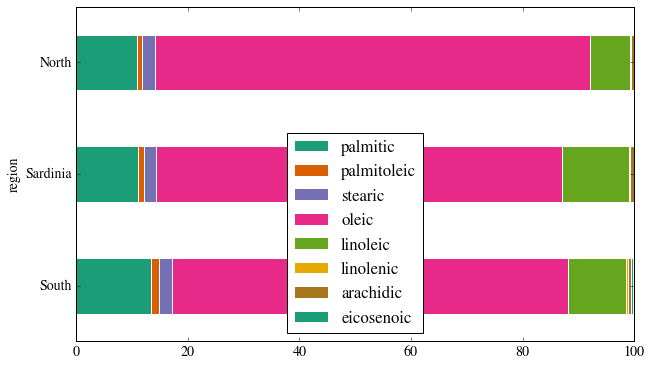

In [50]:
ax=mdf2.plot(kind='barh', stacked=True)
ax.set_yticklabels(rvals)
ax.set_xlim([0,100])

Well, that's kind of ugly. In the appendix we have some code showing how you can clean this plot up.

The above graph get's proportions of all the acids in each region. We can ask the opposite question: for each acid, what's the distribution of regions?

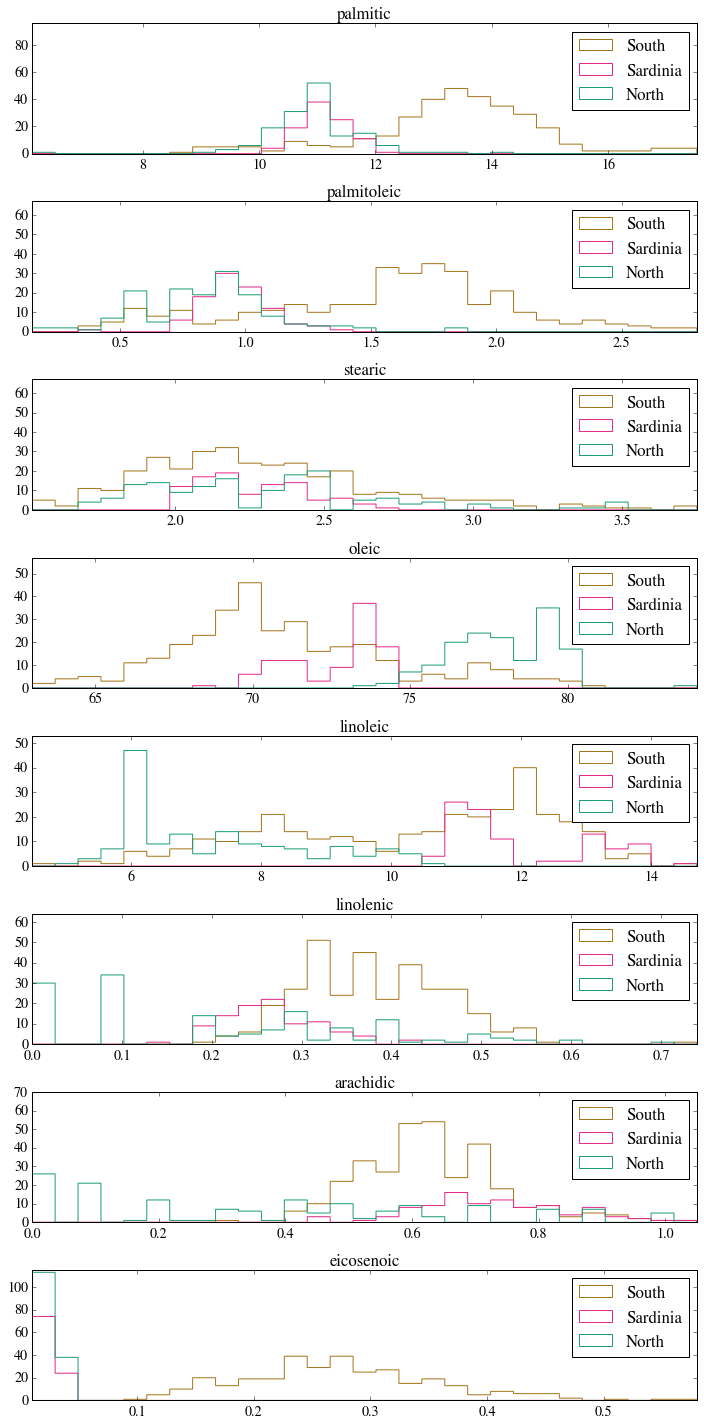

In [52]:
fig, axes=plt.subplots(figsize=(10,20), nrows=len(acidlist), ncols=1)
i=0
colors=[dark2_cmap.mpl_colormap(col) for col in [1.0,0.5,0.0]]
for ax in axes.flatten():
    acid=acidlist[i]
    seriesacid=df[acid]#get the Pandas series
    minmax=[seriesacid.min(), seriesacid.max()]
    counts=[]
    nbins=30
    histbinslist = np.linspace(minmax[0],  minmax[1], nbins)
    counts=-np.diff([seriesacid[seriesacid>x].count() for x in histbinslist]).min()
    for k,g in df.groupby('region'):
        style = {'histtype':'step', 'color':colors[k-1], 'alpha':1.0, 'bins':histbinslist, 'label':rmap[k]}
        ax.hist(g[acid],**style)
        ax.set_xlim(minmax)
        ax.set_title(acid)
        ax.grid(False)
    #construct legend
    ax.set_ylim([0, counts])
    ax.legend()
    i=i+1
fig.tight_layout()

In [53]:
mask=(df.eicosenoic < 0.05)
mask

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
542     True
543     True
544     True
545     True
546     True
547     True
548     True
549     True
550     True
551     True
552     True
553     True
554     True
555     True
556     True
557     True
558     True
559     True
560     True
561     True
562     True
563     True
564     True
565     True
566     True
567     True
568     True
569     True
570     True
571     True
Name: eicosenoic, dtype: bool

The first gives a count, the second is a shortcut to get a probability!

In [54]:
np.sum(mask), np.mean(mask)

(249, 0.43531468531468531)

In [55]:
loweico=df[df.eicosenoic < 0.02]
pd.crosstab(loweico.area, loweico.region)

region,2,3
area,,
5,19,0
6,11,0
7,0,17
8,0,11
9,0,14


You can see that oleic dominates, and doesn't let us see much about the other acids. Remove it and let's draw bar plots again.

In [57]:
rvals

['South', 'Sardinia', 'North']

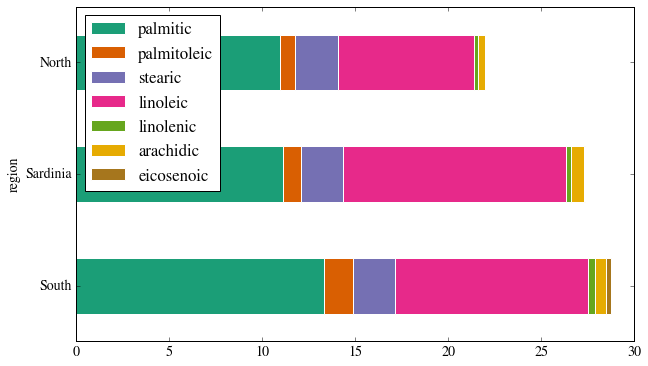

In [56]:
acidlistminusoleic=['palmitic', 'palmitoleic', 'stearic', 'linoleic', 'linolenic', 'arachidic', 'eicosenoic']
#your code here

ax=region_groupby.aggregate(np.mean)[acidlistminusoleic].plot(kind="barh", stacked=True)
ax.set_yticklabels(rvals);

**Note that there are no eicosenoic acids in regions 2 and 3, which are Sardinia and the North respectively**

## Two-dimensional EDA with Pandas

Let's write code to scatterplot acid against acid color coded by region. A more polished version is in the appendix

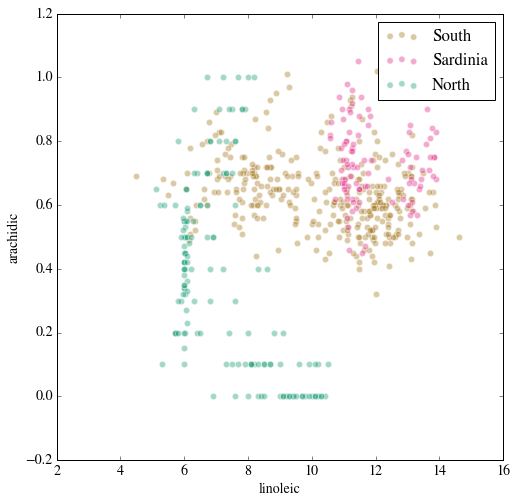

In [58]:
# just do the boxplot without the marginals to split the north out
def make2d(df, scatterx, scattery, by="region", labeler={}):
    figure=plt.figure(figsize=(8,8))
    ax=plt.gca()
    cs=list(np.linspace(0,1,len(df.groupby(by))))
    xlimsd={}
    ylimsd={}
    xs={}
    ys={}
    cold={}
    for k,g in df.groupby(by):
        col=cs.pop()
        x=g[scatterx]
        y=g[scattery]
        xs[k]=x
        ys[k]=y
        c=dark2_cmap.mpl_colormap(col)
        cold[k]=c
        ax.scatter(x, y, c=c, label=labeler.get(k,k), s=40, alpha=0.4);
        xlimsd[k]=ax.get_xlim()
        ylimsd[k]=ax.get_ylim()
    xlims=[min([xlimsd[k][0] for k in xlimsd.keys()]), max([xlimsd[k][1] for k in xlimsd.keys()])]
    ylims=[min([ylimsd[k][0] for k in ylimsd.keys()]), max([ylimsd[k][1] for k in ylimsd.keys()])]
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    ax.set_xlabel(scatterx)
    ax.set_ylabel(scattery)
    ax.grid(False)
    return ax
a=make2d(df, "linoleic","arachidic", labeler=rmap)
a.legend(loc='upper right');

**A nonlinear classifier could separate the north from Sardinia!**

We use the really ugly trellis rplot interface in Pandas to do some hierarchical digging. We plot oleic against linoleic. **We can split Sardinia. We might be able to split East Liguria out but there could be significant misclassification.**

D:\Users\ZB-TQ-G1010448\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The rplot trellis plotting interface is deprecated and will be removed in a future version. We refer to external packages like seaborn for similar but more refined functionality. 

See our docs http://pandas.pydata.org/pandas-docs/stable/visualization.html#rplot for some example how to convert your existing code to these packages.
  if __name__ == '__main__':
D:\Users\ZB-TQ-G1010448\Anaconda3\lib\site-packages\pandas\tools\rplot.py:236: FutureWarning: iget(i) is deprecated. Please use .iloc[i] or .iat[i]
  random.seed(data[self.column].iget(index))


['North-Apulia' 'Calabria' 'South-Apulia' 'Sicily' 'Inland-Sardinia'
 'Coast-Sardinia' 'Umbria' 'East-Liguria' 'West-Liguria']


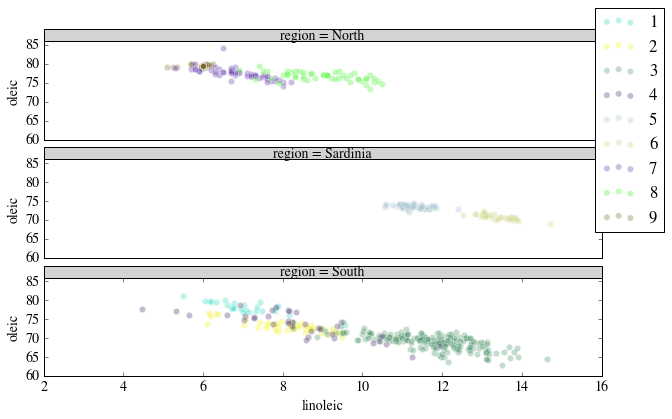

In [60]:
import pandas.tools.rplot as rplot
dfcopy=df.copy()
dfcopy['region']=dfcopy['region'].map(rmap)
imap={e[0]:e[1] for e in zip (df.area.unique(), df.areastring.unique())}
#dfcopy['area']=dfcopy['area'].map(imap)
plot = rplot.RPlot(dfcopy, x='linoleic', y='oleic');
plot.add(rplot.TrellisGrid(['region', '.']))
plot.add(rplot.GeomPoint(size=40.0, alpha=0.3, colour=rplot.ScaleRandomColour('area')));

fig=plot.render()
print(df.areastring.unique())

Plot palmitoleic against palimitic. **What can you separate?** Use the `dfcopy` dataframe.

D:\Users\ZB-TQ-G1010448\Anaconda3\lib\site-packages\pandas\tools\rplot.py:236: FutureWarning: iget(i) is deprecated. Please use .iloc[i] or .iat[i]
  random.seed(data[self.column].iget(index))


['North-Apulia' 'Calabria' 'South-Apulia' 'Sicily' 'Inland-Sardinia'
 'Coast-Sardinia' 'Umbria' 'East-Liguria' 'West-Liguria']


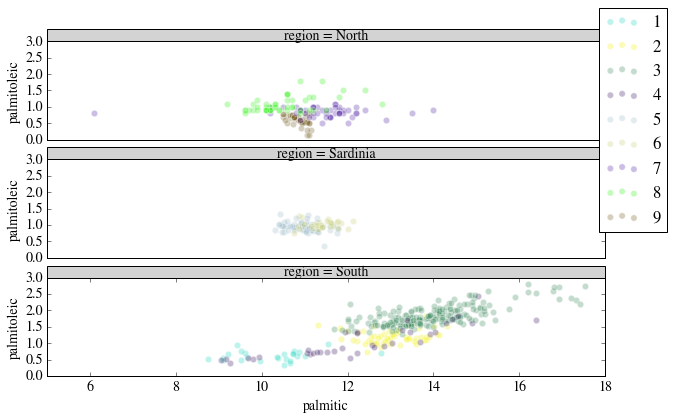

In [62]:
#your code here

plot = rplot.RPlot(dfcopy, x='palmitic', y='palmitoleic');
plot.add(rplot.TrellisGrid(['region', '.']))
plot.add(rplot.GeomPoint(size=40.0, alpha=0.3, colour=rplot.ScaleRandomColour('area')));
fig=plot.render()
print(dfcopy.areastring.unique())

## Appendix: For you to try at home

### Marginal data: Rug plots and histograms 
This code allows you to plot marginals using rug plots and histograms

In [63]:
#adapted from https://github.com/roban/quarum/blob/master/margplot.py
from mpl_toolkits.axes_grid1 import make_axes_locatable
def setup_mhist(axes, figure):
    ax1=axes
    divider = make_axes_locatable(ax1)
    ax2 = divider.append_axes("top", 1.5, pad=0.0, sharex=ax1)
    ax3 = divider.append_axes("right", 1.5, pad=0.0, sharey=ax1)
    #xscale=yscale='log'
    #ax2.set_yscale(yscale)
    #ax3.set_xscale(xscale)
    #ax2.set_ylim([0,1])
    #ax3.set_xlim([0,5])
    ax2.grid(False)
    ax3.grid(False)
    ax2.grid(axis="y", color="white", linestyle='-', lw=1)
    ax3.grid(axis="x", color="white", linestyle='-', lw=1)
    remove_border(ax2, right=True, left=False)
    remove_border(ax3, right=False, left=True, bottom=False, top=True)
    figure.subplots_adjust(left=0.15, right=0.95)
    return [ax1,ax2,ax3]

#BUG: need to get appropriate min and max amongst the multiple marginal hists
#BUG: need to get highest frequency marked as label when we do this.
def make_mhist(axeslist, x, y, color='b', mms=8):
    ax1 = axeslist[0]
    ax2 = axeslist[1]
    ax3 = axeslist[2]
    #print list(ax2.get_yticklabels())
    for tl in (ax2.get_xticklabels() + ax2.get_yticklabels() +
               ax3.get_xticklabels() + ax3.get_yticklabels()):
        tl.set_visible(False)
    #for tl in ( ax2.get_xticklabels() + ax3.get_yticklabels()):
    #    tl.set_visible(False)
    histbinslist = [np.ceil(len(x)/20.), np.ceil(len(y)/20.)]
    histbinslist = copy.copy(histbinslist)
    #style = {'histtype':'stepfilled', 'color':color, 'alpha':0.6, 'normed':True, 'stacked':True}
    style = {'histtype':'stepfilled', 'color':color, 'alpha':0.4}
    nbins = histbinslist[0]
    x_range = [np.min(x), np.max(x)]
    histbinslist[0] = np.linspace(x_range[0],  x_range[1], nbins)

    ax2.hist(x, histbinslist[0], **style)

    nbins = histbinslist[1]
    y_range = [np.min(y), np.max(y)]
    histbinslist[1] = np.linspace(y_range[0], y_range[1], nbins)
    ax3.hist(y, histbinslist[1], orientation='horizontal', **style)

In [64]:
import random
import copy
def scatter_by(df, scatterx, scattery, by=None, figure=None, axes=None, colorscale=dark2_cmap, labeler={}, mfunc=None, setupfunc=None, mms=8):
    cs=copy.deepcopy(colorscale.mpl_colors)
    if not figure:
        figure=plt.figure(figsize=(8,8))
    if not axes:
        axes=figure.gca()
    x=df[scatterx]
    y=df[scattery]
    if not by:
        col=random.choice(cs)
        axes.scatter(x, y, cmap=colorscale, c=col)
        if setupfunc:
            axeslist=setupfunc(axes, figure)
        else:
            axeslist=[axes]
        if mfunc:
            mfunc(axeslist,x,y,color=col, mms=mms)
    else:
        cs=list(np.linspace(0,1,len(df.groupby(by))))
        xlimsd={}
        ylimsd={}
        xs={}
        ys={}
        cold={}
        for k,g in df.groupby(by):
            col=cs.pop()
            x=g[scatterx]
            y=g[scattery]
            xs[k]=x
            ys[k]=y
            c=colorscale.mpl_colormap(col)
            cold[k]=c
            axes.scatter(x, y, c=c, label=labeler.get(k,k), s=40, alpha=0.3);
            xlimsd[k]=axes.get_xlim()
            ylimsd[k]=axes.get_ylim()
        xlims=[min([xlimsd[k][0] for k in xlimsd.keys()]), max([xlimsd[k][1] for k in xlimsd.keys()])]
        ylims=[min([ylimsd[k][0] for k in ylimsd.keys()]), max([ylimsd[k][1] for k in ylimsd.keys()])]
        axes.set_xlim(xlims)
        axes.set_ylim(ylims)
        if setupfunc:
            axeslist=setupfunc(axes, figure)
        else:
            axeslist=[axes]
        if mfunc:
            for k in xs.keys():
                mfunc(axeslist,xs[k],ys[k],color=cold[k], mms=mms);
    axes.set_xlabel(scatterx);
    axes.set_ylabel(scattery);
    
    return axes

def make_rug(axeslist, x, y, color='b', mms=8):
    axes=axeslist[0]
    zerosx1=np.zeros(len(x))
    zerosx2=np.zeros(len(x))
    xlims=axes.get_xlim()
    ylims=axes.get_ylim()
    zerosx1.fill(ylims[1])
    zerosx2.fill(xlims[1])
    axes.plot(x, zerosx1, marker='|', color=color, ms=mms)
    axes.plot(zerosx2, y, marker='_', color=color, ms=mms)
    axes.set_xlim(xlims)
    axes.set_ylim(ylims)
    return axes
    
#BUG: remove ticks and maybe even border on top and right

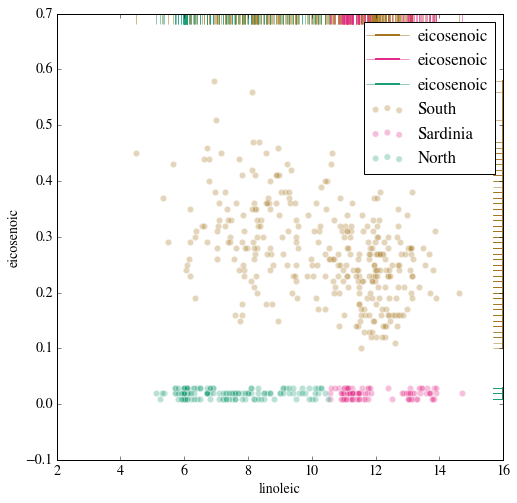

In [65]:
ax=scatter_by(df, 'linoleic', 'eicosenoic', by='region', labeler=rmap, mfunc=make_rug, mms=20)
ax.grid(False)
ax.legend(loc='upper right');

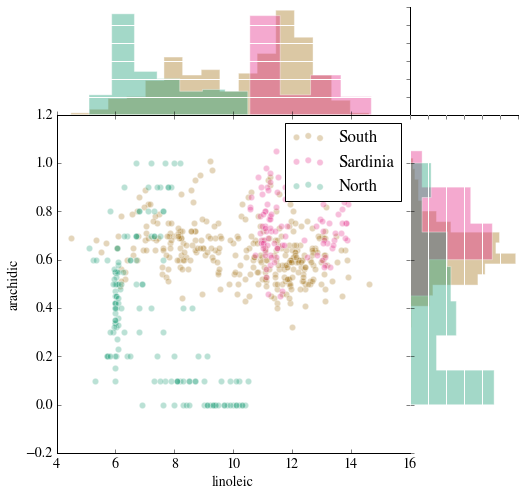

In [66]:
ax=scatter_by(df, 'linoleic', 'arachidic', by='region', labeler=rmap, setupfunc=setup_mhist, mfunc=make_mhist, mms=20)
ax.grid(False)
ax.legend(loc='upper right');

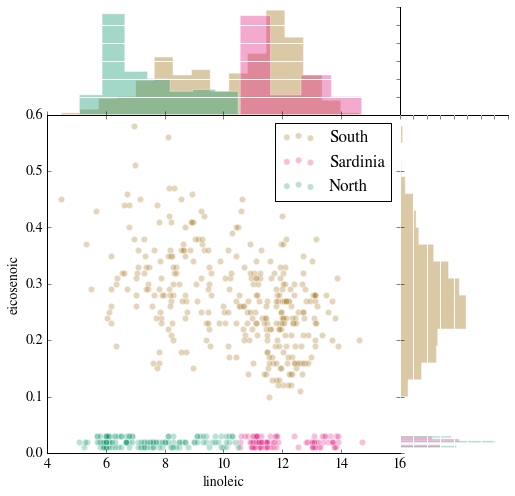

In [67]:
ax=scatter_by(df, 'linoleic', 'eicosenoic', by='region', labeler=rmap, setupfunc=setup_mhist, mfunc=make_mhist, mms=20)
ax.grid(False)
ax.legend(loc='upper right');

### Probability distributions

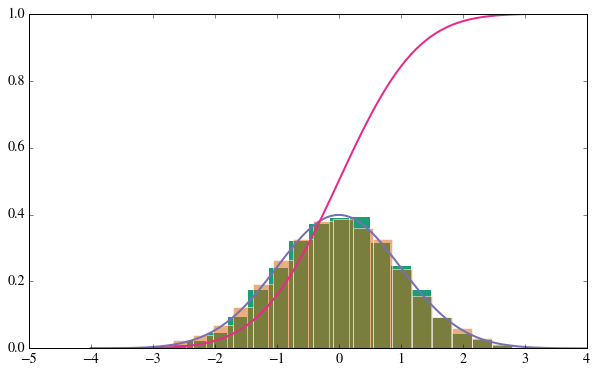

In [68]:
import scipy.stats as stats
mu=0.
sigma=1.
samples=np.random.normal(mu, sigma, 10000)
plt.hist(samples,bins=25, normed=True)
nd=stats.norm()
plt.hist(nd.rvs(size=10000), bins=25, alpha=0.5,normed=True)
x=np.linspace(-4.0,4.0,100)
plt.plot(x,nd.pdf(x))
plt.plot(x,nd.cdf(x))

[-0.60500577 -5.23048223  4.23005286 ...,  1.12774803 -2.18647449
  3.81039316]


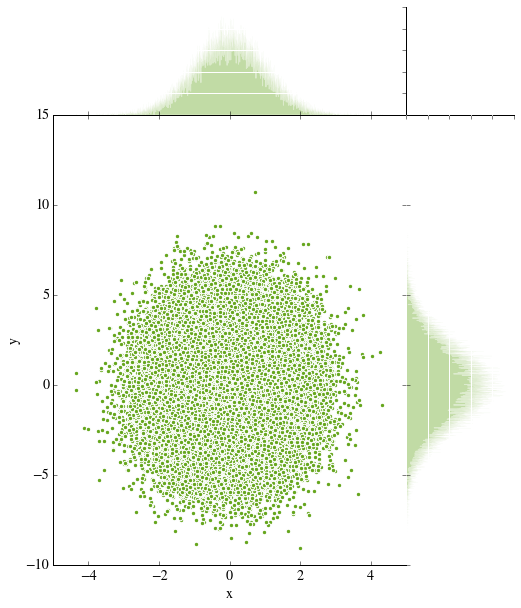

In [70]:
mean = [0,0]
cov = [[1,0],[0,5]] # diagonal covariance, points lie on x or y-axis
m=300
nrvs = np.random.multivariate_normal(mean,cov,(m,m))
duets=nrvs.reshape(m*m,2)
print(duets[:,1])
normaldf=pd.DataFrame(dict(x=duets[:,0], y=duets[:,1]))
normaldf.head()
ax=scatter_by(normaldf, 'x', 'y',  figure=plt.figure(figsize=(8,10)),setupfunc=setup_mhist, mfunc=make_mhist, mms=20)
#ax.grid(False)

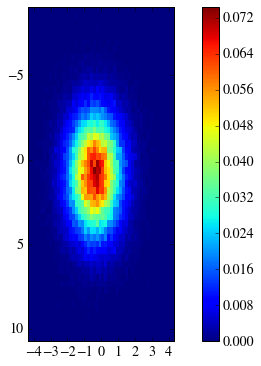

In [71]:
H, xedges, yedges = np.histogram2d(normaldf.x, normaldf.y, bins=(50, 50), normed=True)
extent = [xedges[0], xedges[-1], yedges[-1], yedges[0]]
plt.imshow(H, extent=extent, interpolation='nearest')
plt.colorbar()

### Miscellaneous Pandas Plotting tools: scatters, boxplots, and parallel co-ordinates

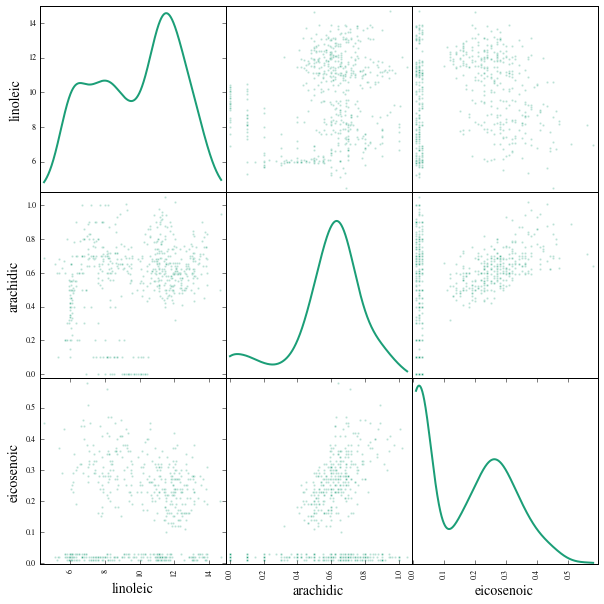

In [72]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df[['linoleic','arachidic','eicosenoic']], alpha=0.3, figsize=(10, 10), diagonal='kde');

D:\Users\ZB-TQ-G1010448\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


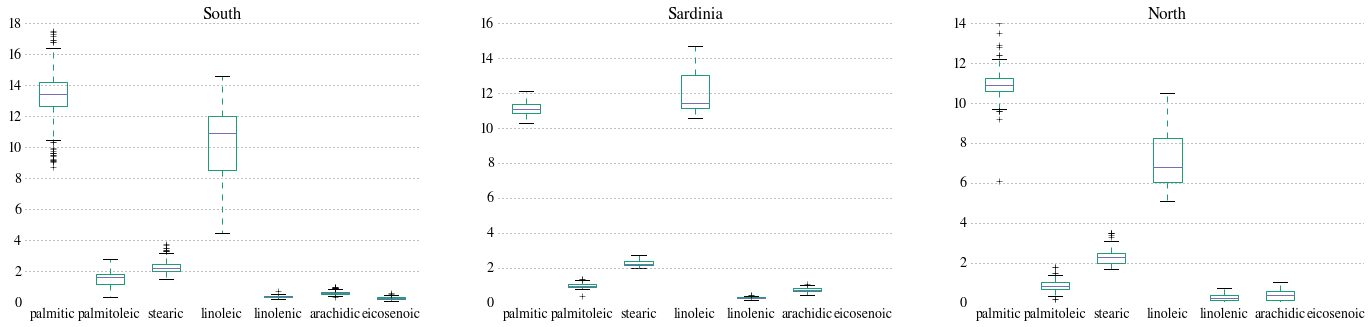

In [73]:
plt.figure(figsize=(24,5))
for key, group in df.groupby('region'):
    plt.subplot(int('13'+str(key)))
    group[acidlistminusoleic].boxplot(grid=False)
    ax=plt.gca()
    ax.set_title(rvals[key-1])
    remove_border(ax, left=False, bottom=False)
    ax.grid(axis="y", color="gray", linestyle=':', lw=1)

D:\Users\ZB-TQ-G1010448\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: the 'colors' keyword is deprecated, use 'color' instead


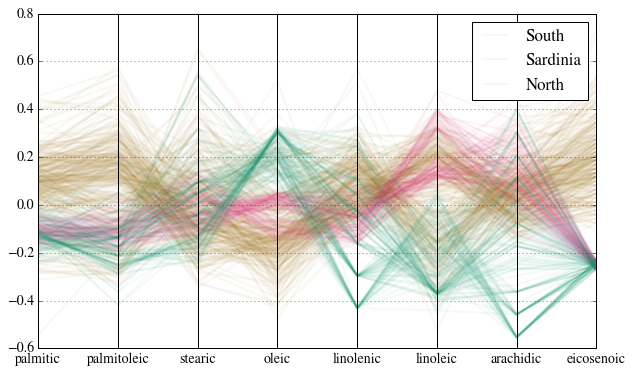

In [74]:
from pandas.tools.plotting import parallel_coordinates
dfna=df[['region', 'palmitic', 'palmitoleic', 'stearic', 'oleic', 'linolenic', 'linoleic', 'arachidic', 'eicosenoic']]
dfna_norm = (dfna - dfna.mean()) / (dfna.max() - dfna.min())
dfna_norm['region']=df['region'].map(lambda x: rmap[x])
parallel_coordinates(dfna_norm, 'region', colors=[dark2_cmap.mpl_colormap(col) for col in [1.0,0.5,0.0]], alpha=0.05)

### Improving the pandas histograms

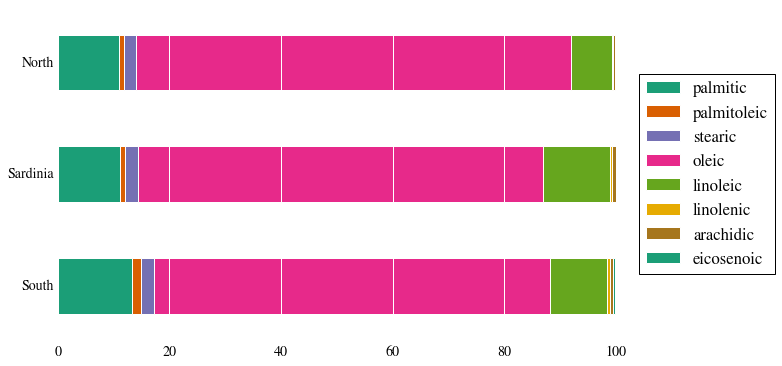

In [75]:
ax2=mdf2.plot(kind='barh', stacked=True, color=dark2_colors, grid=False, legend=False)
remove_border(ax2, left=False, bottom=False)
ax2.grid(axis="x", color="white", linestyle='-', lw=1)
ax2.legend(loc='right', bbox_to_anchor=(1.3,0.5))
labels2=['South','Sardinia','North']
ax2.set_yticklabels(labels2)
ax2.set_ylabel('');
ax2.set_xlim(right=100.0);

['South', 'Sardinia', 'North']


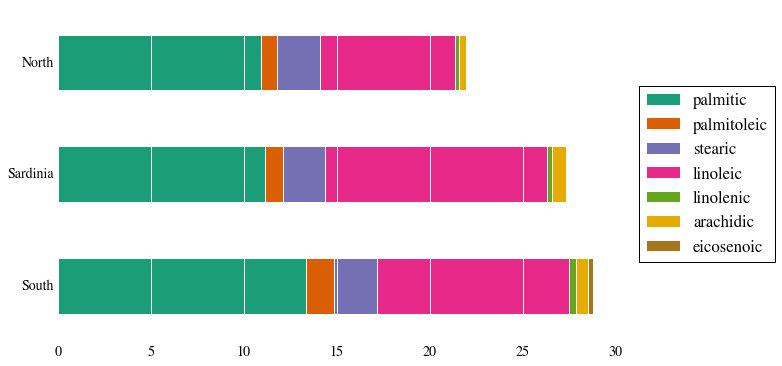

In [77]:
#your code here
def makenice_barplot(frame, by, bymap, columnlist, aggregatefunc=np.mean, largest=100.0):
    df2=df.groupby(by).aggregate(aggregatefunc)
    df2=df2[columnlist]
    ax2=df2.plot(kind='barh', stacked=True, color=dark2_colors, grid=False, legend=False)
    remove_border(ax2, left=False, bottom=False)
    ax2.grid(axis="x", color="white", linestyle='-', lw=1)
    ax2.legend(loc='right', bbox_to_anchor=(1.3,0.5))
    labels=[bymap[i] for i in df2.index]
    print(labels)
    ax2.set_yticklabels(labels)
    ax2.set_ylabel('');
    ax2.set_xlim(right=largest);
makenice_barplot(df,'region', rmap, acidlistminusoleic, largest=30)

### More details are only good at times
It's hard to understand the graph below. A hierarchical approach as we have used is better.

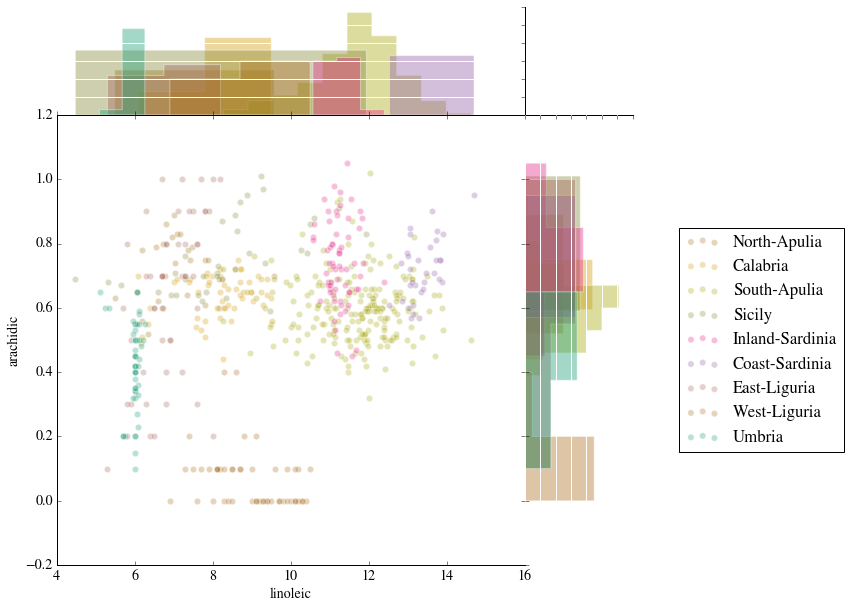

In [78]:
fig=plt.figure(figsize=(10,10))
ax=scatter_by(df, 'linoleic', 'arachidic', by='area', figure=fig, labeler=imap, setupfunc=setup_mhist, mfunc=make_mhist, mms=20)
ax.grid(False)
ax.legend(loc='right', bbox_to_anchor=(1.7,0.5));

On the other hand, inspecting loads of scatter plots is not a bad idea!

In [80]:
indices=np.tril_indices(8)
plts=[]
for i,j in zip(indices[0], indices[1]):
    if i!=j:
        plts.append((i,j))
print(plts)

[(1, 0), (2, 0), (2, 1), (3, 0), (3, 1), (3, 2), (4, 0), (4, 1), (4, 2), (4, 3), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6)]


D:\Users\ZB-TQ-G1010448\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


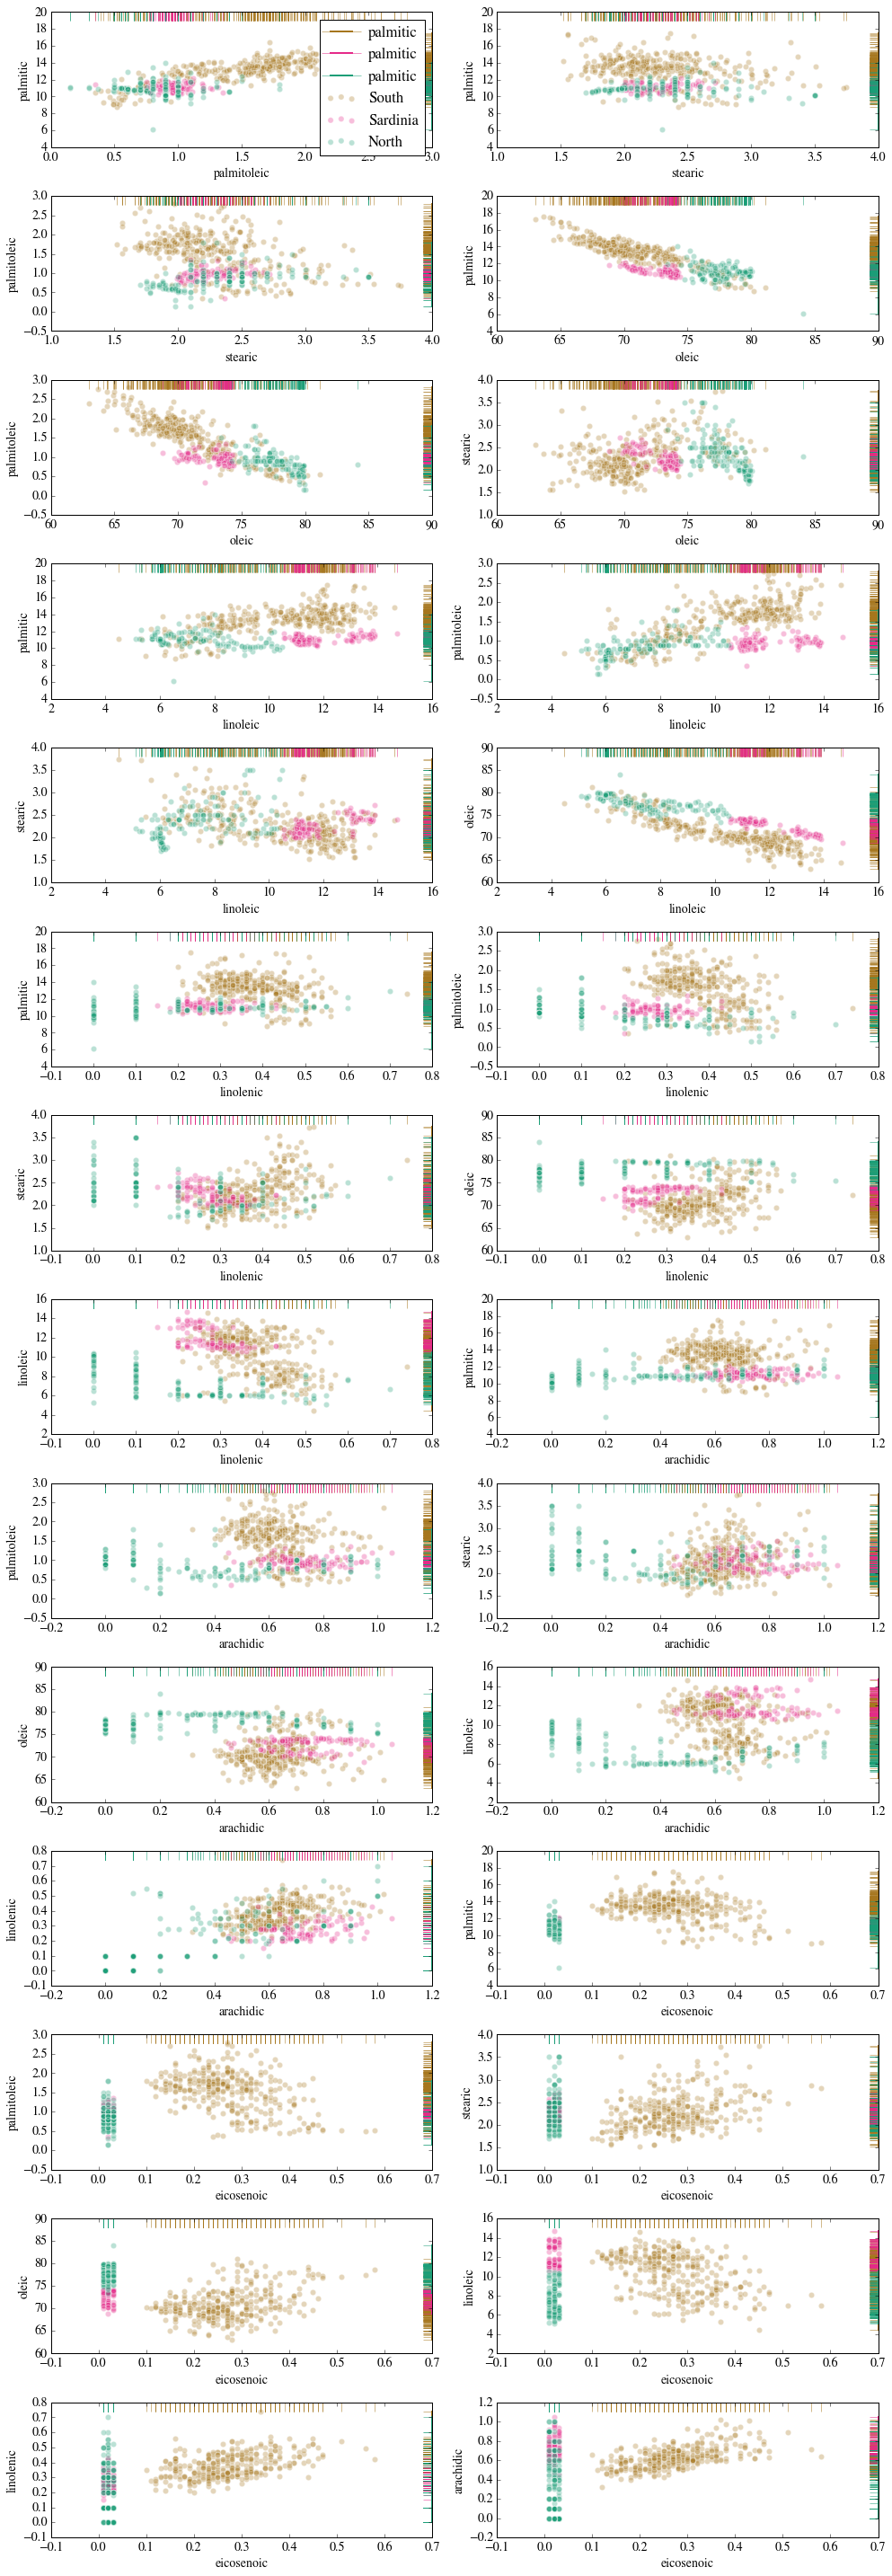

In [81]:
fig, axes = plt.subplots(nrows=14, ncols=2, figsize=(14,40));
k=0
af=axes.flatten()
for a in af:
    i,j=plts[k]
    a=scatter_by(df, acidlist[i], acidlist[j], by='region', axes=a, labeler=rmap, mfunc=make_rug, mms=20);
    a.grid(False);
    k=k+1
af[0].legend(loc='best');
fig.tight_layout();